In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [22]:
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Age': np.random.randint(25, 65, size=n),
    'Tenure': np.random.choice(['Tenured', 'Non-Tenured'], size=n),
    'Beauty_Score': np.round(np.random.normal(5, 1.5, size=n), 2),
    'Teaching_Evaluation': np.round(np.random.normal(4, 0.5, size=n), 2)
})
data

,Gender,Age,Tenure,Beauty_Score,Teaching_Evaluation
0,Male,42,Non-Tenured,4.42,4.52
1,Female,50,Tenured,3.67,3.69
2,Male,58,Tenured,4.46,3.78
3,Male,34,Non-Tenured,5.83,3.17
4,Male,60,Tenured,6.57,3.61
...,...,...,...,...,...
95,Female,51,Non-Tenured,7.77,4.44
96,Female,37,Non-Tenured,7.05,4.58
97,Female,27,Tenured,6.24,3.76
98,Female,63,Non-Tenured,5.02,3.67


In [4]:
alpha = 0.05

In [23]:
# Q1. T-Test: Does gender affect teaching evaluation rates?
print("Question 1: Independent T-Test (Gender and Evaluation Score) \n")


print("Null Hypothesis (H0): No difference in evaluation scores between genders.")
print("Alternative Hypothesis (H1): There is a difference. \n")

# get evaluation scores for each gender
female_scores = data[data['Gender'] == 'Female']['Teaching_Evaluation']
male_scores = data[data['Gender'] == 'Male']['Teaching_Evaluation']

# perform the independent t-test
t_stat, p_value_ttest = stats.ttest_ind(female_scores, male_scores, nan_policy='omit')

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f} \n")

if p_value_ttest < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in teaching evaluation scores between genders.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in teaching evaluation scores between genders.\n")


Question 1: Independent T-Test (Gender and Evaluation Score) 

Null Hypothesis (H0): No difference in evaluation scores between genders.
Alternative Hypothesis (H1): There is a difference. 

T-statistic: -1.1099
P-value: 0.2698 

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant difference in teaching evaluation scores between genders.



In [24]:
# Q2. ANOVA: Does beauty score for instructors differ by age?
print("Question 2: ANOVA (Age and Beauty Score) \n")

print("Null Hypothesis (H0): No significant difference in beauty scores across age groups")
print("Alternative Hypothesis (H1): At least one age group has a significantly different mean beauty score \n")

# age groups
bins = [0, 40, 55, 100]
labels = ['Young', 'Middle-Aged', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

# extract beauty scores for each group
group_young = data[data['Age_Group'] == 'Young']['Beauty_Score']
group_middle = data[data['Age_Group'] == 'Middle-Aged']['Beauty_Score']
group_senior = data[data['Age_Group'] == 'Senior']['Beauty_Score']

# perform the ANOVA test
f_stat, p_value_anova = stats.f_oneway(group_young, group_middle, group_senior)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f} \n")

if p_value_anova < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in mean beauty scores among the age groups.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in mean beauty scores among the age groups.\n")


Question 2: ANOVA (Age and Beauty Score) 

Null Hypothesis (H0): No significant difference in beauty scores across age groups
Alternative Hypothesis (H1): At least one age group has a significantly different mean beauty score 

F-statistic: 1.0870
P-value: 0.3413 

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant difference in mean beauty scores among the age groups.



In [25]:
# Q3. Chi-square: Is there an association between tenure and gender?
print("Question 3: Chi-square Test (Tenure and Gender) \n")

print("Null Hypothesis (H0): No association between tenure and gender")
print("Alternative Hypothesis (H1): There is an association between tenure and gender \n")

# contingency table
contingency_table = pd.crosstab(data['Tenure'], data['Gender'])
print("Contingency Table:")
print(contingency_table)

# perform the chi-square test
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi2:.4f} \n")

if p_value_chi2 < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant association between tenure and gender.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant association between tenure and gender.\n")


Question 3: Chi-square Test (Tenure and Gender) 

Null Hypothesis (H0): No association between tenure and gender
Alternative Hypothesis (H1): There is an association between tenure and gender 

Contingency Table:
Gender       Female  Male
Tenure                   
Non-Tenured      27    26
Tenured          29    18

Chi-square statistic: 0.7743
P-value: 0.3789 

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant association between tenure and gender.



Question 4: Pearson Correlation (Evaluation Score and Beauty Score) 

Null Hypothesis (H0): No linear correlation between teaching evaluation and beauty scores.
Alternative Hypothesis (H1): There is a linear correlation. 

Pearson Correlation Coefficient (r): -0.0247
P-value: 0.8070 

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant linear correlation between these variables.


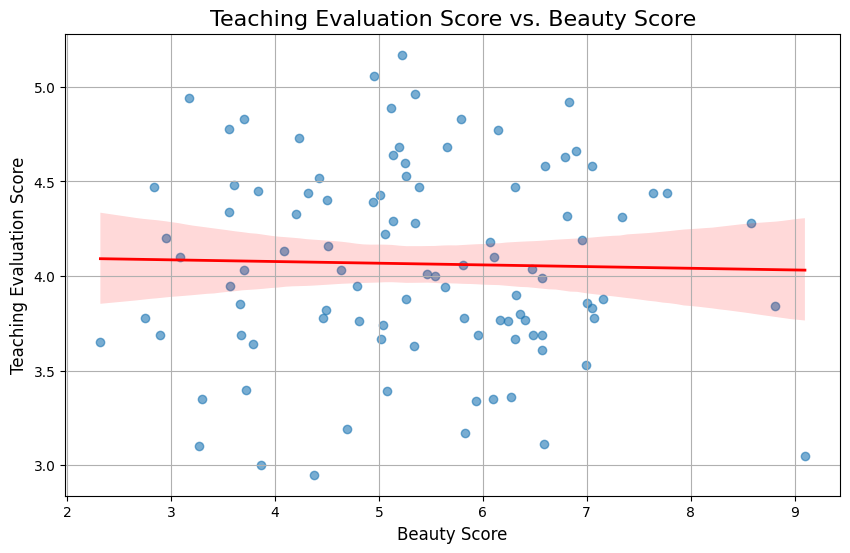

In [27]:
# Q4. Correlation: Is teaching evaluation score correlated with beauty score?
print("Question 4: Pearson Correlation (Evaluation Score and Beauty Score) \n")

print("Null Hypothesis (H0): No linear correlation between teaching evaluation and beauty scores.")
print("Alternative Hypothesis (H1): There is a linear correlation. \n")

# extract the two variables, dropping NaNs if any
eval_score = data['Teaching_Evaluation'].dropna()
beauty_score = data['Beauty_Score'].dropna()

# align indices (in case of missing values)
common_index = eval_score.index.intersection(beauty_score.index)
eval_score = eval_score.loc[common_index]
beauty_score = beauty_score.loc[common_index]

# calculate Pearson correlation
corr_coeff, p_value_corr = stats.pearsonr(eval_score, beauty_score)

print(f"Pearson Correlation Coefficient (r): {corr_coeff:.4f}")
print(f"P-value: {p_value_corr:.4f} \n")

if p_value_corr < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant linear correlation between teaching evaluation score and beauty score.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant linear correlation between these variables.")

# scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Beauty_Score', y='Teaching_Evaluation', data=data,
            line_kws={"color": "red", "lw": 2}, scatter_kws={'alpha': 0.6})
plt.title('Teaching Evaluation Score vs. Beauty Score', fontsize=16)
plt.xlabel('Beauty Score', fontsize=12)
plt.ylabel('Teaching Evaluation Score', fontsize=12)
plt.grid(True)
plt.show()